# Importing All the Necessary Libraries

In [204]:
import numpy as np 
import pandas as pd

# Reading the Data Set

In [205]:
Data = pd.read_csv('Churn_Modelling.csv')
Data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [206]:
Data.shape

(10000, 14)

In [207]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Checking for duplicated Data 

In [208]:
Data.duplicated().sum()

0

# Dropping the Columns

In [209]:
Data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [210]:
Data.shape

(10000, 11)

# Encoding the cateegorical Columns

In [211]:
Data = pd.get_dummies(data=Data,columns=['Geography','Gender'],drop_first=True)

In [212]:
Data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


# Splitting the Data set 

In [213]:
X = Data.drop('Exited',axis=1)
y = Data['Exited']

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
X_train.shape

(8000, 11)

In [216]:
X_test.shape

(2000, 11)

# Feature Scaling 

In [217]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [218]:
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [219]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [220]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# Bulding the Artifical Neural Network 

In [221]:
import tensorflow 
from tensorflow import keras 
from tensorflow.keras import Sequential 
from keras.layers import Dense


In [222]:
model = Sequential()

model.add((Dense(3, activation='sigmoid',input_dim=11)))
model.add(Dense(1,activation='sigmoid'))

In [223]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 3)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [224]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [225]:
history = model.fit(X_train,y_train,epochs=10, validation_split=0.2)

Epoch 1/10
197/200 [============================>.] - ETA: 0s - loss: 0.6189 - accuracy: 0.7253

200/200 [==============================] - 1s 4ms/step - loss: 0.6180 - accuracy: 0.7269 - val_loss: 0.5633 - val_accuracy: 0.7987
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7934 - val_loss: 0.5115 - val_accuracy: 0.7987
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7934 - val_loss: 0.4862 - val_accuracy: 0.7987
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4894 - accuracy: 0.7934 - val_loss: 0.4706 - val_accuracy: 0.7987
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7934 - val_loss: 0.4590 - val_accuracy: 0.7987
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4670 - accuracy: 0.7934 - val_loss: 0.4496 - val_accuracy: 0.7987
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7934 - val_loss: 0.4419 - val_accuracy: 0.7987
Epoch 8/10
200/20

In [226]:
model.layers[0].get_weights()

[array([[ 1.02415614e-01,  6.91486821e-02,  1.88134119e-01],
        [-9.81450737e-01,  1.49919116e+00, -1.28115070e+00],
        [ 2.14129508e-01,  3.17808956e-01, -2.89394796e-01],
        [-5.93393743e-01, -7.08498657e-02, -3.79781164e-02],
        [-4.82975617e-02, -2.35358234e-02,  1.28818691e-01],
        [ 5.40366955e-02, -1.09933347e-01, -1.05218463e-01],
        [ 5.42389512e-01, -4.14069504e-01,  7.14440167e-01],
        [ 5.28099835e-02,  3.72312628e-02, -3.40046227e-01],
        [-3.12168032e-01,  5.98870218e-01, -6.12759829e-01],
        [ 1.96974903e-01,  3.92811537e-01, -2.33920634e-01],
        [ 6.32733881e-01, -7.93046355e-02,  1.24892290e-03]], dtype=float32),
 array([ 0.47038794, -0.29488134,  0.07318594], dtype=float32)]

In [227]:
model.layers[1].get_weights()

[array([[-1.7562501 ],
        [ 0.50280637],
        [-0.5031319 ]], dtype=float32),
 array([-0.43727928], dtype=float32)]

In [228]:
y_p = model.predict(X_test)

 1/63 [..............................] - ETA: 3s

63/63 [==============================] - 0s 2ms/step


In [229]:
y_pred = np.where(y_p>0.5,1,0)

In [230]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [231]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8055

# Improving the Model Performance by Changing some Parameters 

In [232]:
model = Sequential()

model.add((Dense(11, activation='relu',input_dim=11)))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [233]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 11)                132       
                                                                 
 dense_25 (Dense)            (None, 11)                132       
                                                                 
 dense_26 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [234]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [235]:
history1 = model.fit(X_train,y_train,epochs=100, validation_split=0.2)

Epoch 1/100


200/200 [==============================] - 1s 2ms/step - loss: 0.5869 - accuracy: 0.6953 - val_loss: 0.4639 - val_accuracy: 0.8056
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7998 - val_loss: 0.4284 - val_accuracy: 0.8200
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8067 - val_loss: 0.4161 - val_accuracy: 0.8238
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4239 - accuracy: 0.8123 - val_loss: 0.4087 - val_accuracy: 0.8275
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4115 - accuracy: 0.8225 - val_loss: 0.3980 - val_accuracy: 0.8406
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8388 - val_loss: 0.3885 - val_accuracy: 0.8469
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8492 - val_loss: 0.3773 - val_accuracy: 0.8487
Epoch 8/100

In [236]:
model.layers[0].get_weights()

[array([[ 0.09726946, -0.06064366, -0.08273262, -0.08834783, -0.27819648,
          0.46175292,  0.03438827, -0.12141217,  0.01444863, -0.09102707,
         -0.00888781],
        [-0.9401578 ,  1.0490224 ,  0.17905954,  0.28951597,  0.322216  ,
         -0.37831414, -0.0638357 , -0.72382116,  0.87188935, -0.3155333 ,
         -0.5555026 ],
        [-0.11796685,  0.09215444, -0.04191369, -0.02161536, -0.16599672,
          0.42941234,  0.03985096,  0.05921135,  0.36064374,  0.55213267,
         -0.22808161],
        [-0.08718527, -0.3235311 ,  0.37114352, -0.23286167, -0.52545726,
         -0.85991585,  0.04142375, -0.29966226, -0.6787098 ,  0.43582448,
          0.29651082],
        [-0.03038637, -0.2717658 ,  1.0668635 , -0.90078306,  0.16648605,
         -0.48524722,  0.26546228,  0.26390415,  0.4955765 , -0.29640317,
          0.22543707],
        [ 0.01456317,  0.04430944, -0.126308  ,  0.01803405, -0.04666885,
         -0.04134336,  0.08730392, -0.0434733 , -0.21890071,  0.4128747

In [237]:
model.layers[1].get_weights()

[array([[ 3.78575504e-01,  1.14480838e-01,  3.83580178e-01,
          3.35660219e-01, -1.34449720e-01, -2.77881533e-01,
          2.28345424e-01,  3.77422273e-01, -4.21232909e-01,
          3.64902377e-01,  5.05338848e-01],
        [ 6.75850689e-01,  9.71678272e-02,  7.52294064e-01,
          6.11035407e-01, -1.08705592e+00,  3.25301200e-01,
          6.78378716e-02, -7.08778262e-01, -7.42661595e-01,
         -1.55375898e+00, -3.75202335e-02],
        [ 1.66893154e-01,  7.91812360e-01, -5.22721075e-02,
          1.89353719e-01,  1.14831257e+00, -5.51665843e-01,
         -3.15636307e-01,  1.16019964e+00, -3.74953002e-01,
         -3.51896852e-01,  6.08731389e-01],
        [ 1.01064108e-02, -1.14660695e-01, -6.60300478e-02,
         -1.53415963e-01,  3.71616036e-01, -5.53408086e-01,
         -8.77418816e-02, -3.00371200e-01,  5.90128779e-01,
         -2.11487785e-01, -8.38305876e-02],
        [ 3.71502459e-01,  1.09291591e-01,  4.81951654e-01,
          5.36724865e-01,  5.98313846e-02, -

In [238]:
model.layers[2].get_weights()

[array([[-0.41046503],
        [ 0.5699911 ],
        [-0.36470994],
        [-0.09007978],
        [ 0.99185354],
        [-1.0696414 ],
        [ 1.1800549 ],
        [ 0.7201772 ],
        [ 1.2373781 ],
        [-1.1923841 ],
        [ 0.5703786 ]], dtype=float32),
 array([-0.06725818], dtype=float32)]

In [239]:
y_p = model.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [240]:
y_pred = np.where(y_p>0.5,1,0)

In [241]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [242]:
import matplotlib.pyplot as plt

In [243]:
history.history

{'loss': [0.6179807186126709,
  0.5418571829795837,
  0.5076223611831665,
  0.4893668293952942,
  0.47690483927726746,
  0.46700024604797363,
  0.45875388383865356,
  0.4517503082752228,
  0.44614845514297485,
  0.44186699390411377],
 'accuracy': [0.7268750071525574,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.7934374809265137,
  0.793749988079071],
 'val_loss': [0.5632736086845398,
  0.5114869475364685,
  0.486221045255661,
  0.47056862711906433,
  0.4590369760990143,
  0.4496051073074341,
  0.44187188148498535,
  0.4354223310947418,
  0.43062713742256165,
  0.4270527958869934],
 'val_accuracy': [0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.7987499833106995,
  0.8018749952316284]}

In [244]:
history1.history

{'loss': [0.5868505835533142,
  0.46128585934638977,
  0.4372106194496155,
  0.42387253046035767,
  0.4115232229232788,
  0.3970959484577179,
  0.3826254904270172,
  0.3705143332481384,
  0.36158639192581177,
  0.3557489514350891,
  0.351775586605072,
  0.34973469376564026,
  0.34714275598526,
  0.346053808927536,
  0.3435576260089874,
  0.34262025356292725,
  0.34090718626976013,
  0.3399152457714081,
  0.33924031257629395,
  0.33823928236961365,
  0.337650328874588,
  0.3368520736694336,
  0.33617568016052246,
  0.33556270599365234,
  0.3350125253200531,
  0.33444899320602417,
  0.33408305048942566,
  0.33379119634628296,
  0.3327923119068146,
  0.3324454128742218,
  0.33296316862106323,
  0.3320905268192291,
  0.3309645354747772,
  0.33112767338752747,
  0.3305097818374634,
  0.3302256762981415,
  0.329590767621994,
  0.3292134404182434,
  0.32950377464294434,
  0.3289460837841034,
  0.3291257917881012,
  0.328246146440506,
  0.32833603024482727,
  0.32807689905166626,
  0.327991127

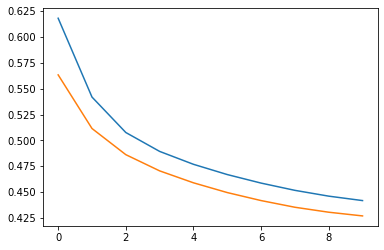

In [245]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

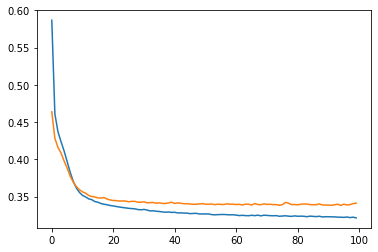

In [246]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

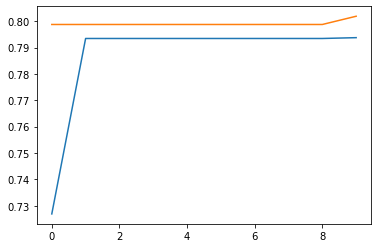

In [247]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

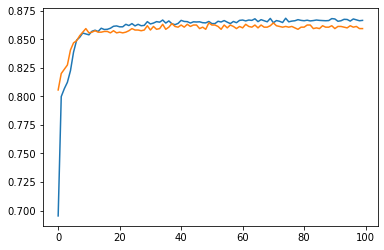

In [248]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])